# Sergio Guerra Project Part 4

## Data Preparation

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

covid_data = pd.read_csv('super_covid_data.csv')
covid_df = pd.DataFrame(covid_data)

covid_df.head()

,countyFIPS,County Name_x,State_x,StateFIPS_x,2020-01-22_x,2020-01-23_x,2020-01-24_x,2020-01-25_x,2020-01-26_x,2020-01-27_x,...,2023-07-17_y,2023-07-18_y,2023-07-19_y,2023-07-20_y,2023-07-21_y,2023-07-22_y,2023-07-23_y,County Name,State,population
0,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,Autauga County,AL,55869
1,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,Baldwin County,AL,223234
2,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,Barbour County,AL,24686
3,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,Bibb County,AL,22394
4,1009,Blount County,AL,1,0,0,0,0,0,0,...,261,261,261,261,261,261,261,Blount County,AL,57826


In [2]:
start_date = "2020-06-01"
end_date = "2021-01-04"

date_columns = covid_df.columns[(covid_df.columns >= start_date) & (covid_df.columns <= end_date)]

columns = ['countyFIPS', 'County Name_x', 'State_x', 'StateFIPS_x', 'County Name_y', 'State_y', 'StateFIPS_y', 'County Name', 'State', 'population'] + date_columns.tolist()

covid_df = covid_df[columns]

covid_df

,countyFIPS,County Name_x,State_x,StateFIPS_x,County Name_y,State_y,StateFIPS_y,County Name,State,population,...,2020-12-25_y,2020-12-26_y,2020-12-27_y,2020-12-28_y,2020-12-29_y,2020-12-30_y,2020-12-31_y,2021-01-01_y,2021-01-02_y,2021-01-03_y
0,1001,Autauga County,AL,1,Autauga County,AL,1,Autauga County,AL,55869,...,46,46,47,47,47,48,48,50,50,50
1,1003,Baldwin County,AL,1,Baldwin County,AL,1,Baldwin County,AL,223234,...,151,151,152,152,156,160,161,169,169,169
2,1005,Barbour County,AL,1,Barbour County,AL,1,Barbour County,AL,24686,...,32,32,32,32,32,32,32,33,33,33
3,1007,Bibb County,AL,1,Bibb County,AL,1,Bibb County,AL,22394,...,42,42,42,42,42,46,46,46,46,46
4,1009,Blount County,AL,1,Blount County,AL,1,Blount County,AL,57826,...,58,58,58,58,58,63,63,63,63,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,Sweetwater County,WY,56,Sweetwater County,WY,56,Sweetwater County,WY,42343,...,15,15,15,15,15,15,16,16,16,16
3138,56039,Teton County,WY,56,Teton County,WY,56,Teton County,WY,23464,...,2,2,2,3,3,3,4,4,4,4
3139,56041,Uinta County,WY,56,Uinta County,WY,56,Uinta County,WY,20226,...,7,7,7,7,7,7,7,7,7,7
3140,56043,Washakie County,WY,56,Washakie County,WY,56,Washakie County,WY,7805,...,11,11,11,16,16,16,19,19,19,19


In [3]:
# Cases are denoted with the _x
cases_dates = covid_df.columns[covid_df.columns.str.endswith('_x')]

cases_dates = cases_dates.delete([0, 1, 2])

cases_dates

Index(['2020-06-01_x', '2020-06-02_x', '2020-06-03_x', '2020-06-04_x',
       '2020-06-05_x', '2020-06-06_x', '2020-06-07_x', '2020-06-08_x',
       '2020-06-09_x', '2020-06-10_x',
       ...
       '2020-12-25_x', '2020-12-26_x', '2020-12-27_x', '2020-12-28_x',
       '2020-12-29_x', '2020-12-30_x', '2020-12-31_x', '2021-01-01_x',
       '2021-01-02_x', '2021-01-03_x'],
      dtype='object', length=217)

In [4]:
# Deaths are denoted with the _y
deaths_dates = covid_df.columns[covid_df.columns.str.endswith('_y')]

deaths_dates = deaths_dates.delete([0, 1, 2])

deaths_dates

Index(['2020-06-01_y', '2020-06-02_y', '2020-06-03_y', '2020-06-04_y',
       '2020-06-05_y', '2020-06-06_y', '2020-06-07_y', '2020-06-08_y',
       '2020-06-09_y', '2020-06-10_y',
       ...
       '2020-12-25_y', '2020-12-26_y', '2020-12-27_y', '2020-12-28_y',
       '2020-12-29_y', '2020-12-30_y', '2020-12-31_y', '2021-01-01_y',
       '2021-01-02_y', '2021-01-03_y'],
      dtype='object', length=217)

## North Carolina Setup

In [5]:
nc_df = covid_df[covid_df['State'] == 'NC']

nc_df = nc_df[cases_dates]

nc_df

,2020-06-01_x,2020-06-02_x,2020-06-03_x,2020-06-04_x,2020-06-05_x,2020-06-06_x,2020-06-07_x,2020-06-08_x,2020-06-09_x,2020-06-10_x,...,2020-12-25_x,2020-12-26_x,2020-12-27_x,2020-12-28_x,2020-12-29_x,2020-12-30_x,2020-12-31_x,2021-01-01_x,2021-01-02_x,2021-01-03_x
1890,364,368,382,398,427,451,465,494,519,544,...,9509,9509,9509,10120,10164,10274,10397,10397,10797,10876
1891,35,38,38,38,38,43,43,43,43,43,...,2367,2367,2367,2526,2564,2642,2662,2662,2755,2806
1892,17,18,18,22,24,28,28,29,30,30,...,558,558,558,611,619,633,638,638,670,674
1893,65,66,68,68,70,71,72,74,78,78,...,1284,1284,1284,1380,1383,1402,1407,1407,1464,1482
1894,36,36,36,39,39,40,40,40,41,42,...,1108,1108,1108,1185,1187,1211,1212,1212,1296,1312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,1161,1179,1188,1212,1240,1268,1306,1335,1337,1367,...,6983,6983,6983,7261,7293,7362,7422,7422,7586,7656
1986,500,500,500,502,504,507,509,511,513,513,...,3554,3554,3554,3745,3761,3832,3877,3877,4029,4085
1987,359,363,370,403,413,426,443,445,452,456,...,5124,5124,5124,5365,5384,5454,5516,5516,5658,5732
1988,177,181,196,203,208,215,216,217,221,225,...,2200,2200,2200,2310,2318,2356,2377,2377,2488,2516


## NC Cases Model

In [6]:
start_date = "2020-06-01"
end_date = "2021-01-03"
date_range = pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()

days_since_start = np.arange(len(date_range)).reshape(-1, 1)

cases_data = nc_df.sum(axis=0).values

# Create and fit linear model
linear_reg = LinearRegression()
linear_reg.fit(days_since_start, cases_data.reshape(-1, 1))
linear_predictions = linear_reg.predict(days_since_start)
linear_rmse = np.sqrt(mean_squared_error(cases_data, linear_predictions))

# Create polynomial model
degree = 3  
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(days_since_start)
reg_poly = LinearRegression().fit(X_poly, cases_data.reshape(-1, 1))

# Calculate RMSE for polynomial regression
poly_predictions = reg_poly.predict(X_poly)
poly_rmse = np.sqrt(mean_squared_error(cases_data, poly_predictions))

# Print RMSE values
print(f"Linear Regression RMSE: {linear_rmse}")
print(f"Polynomial Regression RMSE (degree={degree}): {poly_rmse}")

# Predictions for the next week
days_future = np.arange(len(date_range), len(date_range) + 7).reshape(-1, 1)
X_future_poly = poly_features.transform(days_future)
cases_pred = reg_poly.predict(X_future_poly)

# Bootstrap to calculate confidence interval
n_bootstraps = 1000
bootstrap_predictions = []
for _ in range(n_bootstraps):
    indices = np.random.choice(len(cases_data), size=len(cases_data), replace=True)
    X_boot = X_poly[indices]
    y_boot = cases_data[indices]
    reg_boot = LinearRegression().fit(X_boot, y_boot.reshape(-1, 1))
    X_plot_poly = poly_features.transform(np.arange(len(date_range) + 7).reshape(-1, 1))
    bootstrap_predictions.append(reg_boot.predict(X_plot_poly))
    
# Calculate confidence interval
confidence_interval = np.percentile(bootstrap_predictions, [2.5, 97.5], axis=0)

# Flatten confidence interval arrays
confidence_interval_lower = confidence_interval[0].flatten()
confidence_interval_upper = confidence_interval[1].flatten()

Linear Regression RMSE: 33094.57444567376
Polynomial Regression RMSE (degree=3): 6729.32213331224


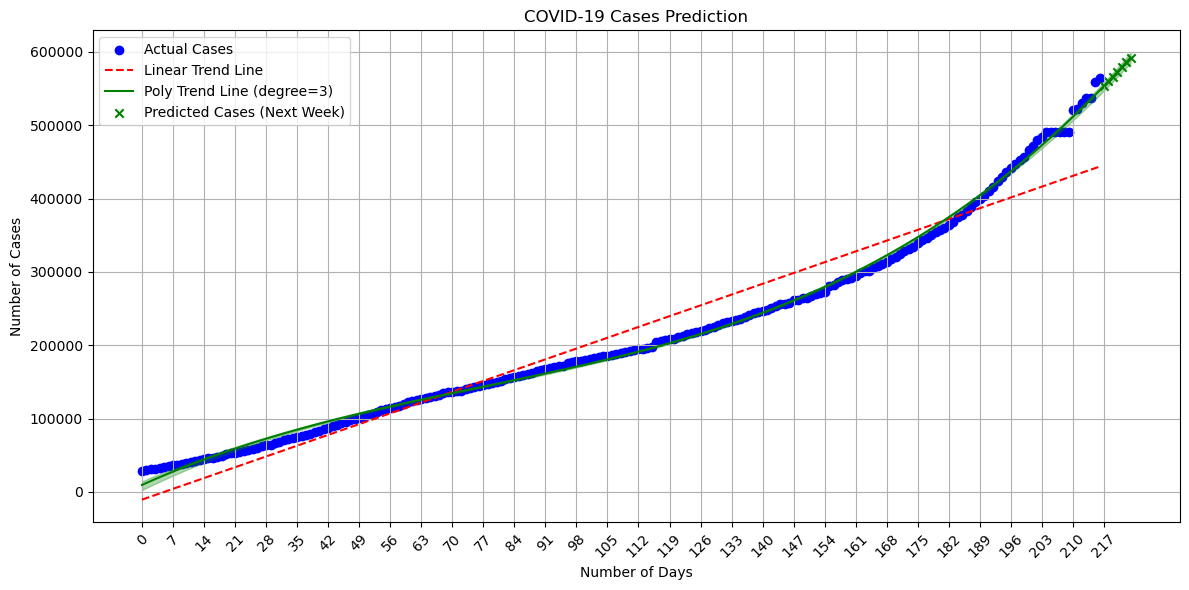

In [7]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot actual data
plt.scatter(days_since_start, cases_data, color='blue', label='Actual Cases')

# Plot linear regression trend line
plt.plot(days_since_start, linear_reg.predict(days_since_start), color='red', linestyle='--', label='Linear Trend Line')

# Plot polynomial regression trend line and confidence interval
plt.plot(np.arange(len(date_range) + 7), reg_poly.predict(X_plot_poly), color='green', label=f'Poly Trend Line (degree={degree})')
plt.fill_between(np.arange(len(date_range) + 7), confidence_interval_lower, confidence_interval_upper, color='green', alpha=0.3)

# Plotting predictions
plt.scatter(days_future, cases_pred, color='green', marker='x', label='Predicted Cases (Next Week)')

plt.xlabel('Number of Days')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases Prediction')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, len(date_range) + 7, 7), rotation=45)
plt.tight_layout()
plt.show()

## NC Deaths Model

In [8]:
nc_df = covid_df[covid_df['State'] == 'NC']

nc_df = nc_df[deaths_dates]

deaths_data = nc_df.sum(axis=0).values

deaths_data

array([ 896,  919,  937,  955,  962,  987,  990, 1001, 1024, 1041, 1058,
       1086, 1099, 1104, 1113, 1147, 1161, 1169, 1191, 1206, 1214, 1217,
       1244, 1264, 1283, 1285, 1311, 1315, 1318, 1334, 1361, 1378, 1388,
       1395, 1396, 1398, 1420, 1440, 1459, 1476, 1488, 1503, 1510, 1551,
       1565, 1565, 1606, 1629, 1634, 1642, 1668, 1698, 1726, 1746, 1778,
       1785, 1790, 1790, 1861, 1901, 1922, 1962, 1967, 1980, 2008, 2049,
       2091, 2133, 2159, 2167, 2171, 2203, 2203, 2286, 2312, 2342, 2346,
       2348, 2396, 2431, 2465, 2494, 2520, 2530, 2534, 2567, 2604, 2628,
       2652, 2683, 2692, 2702, 2741, 2779, 2803, 2803, 2888, 2889, 2896,
       2909, 2957, 2990, 3023, 3047, 3052, 3060, 3111, 3147, 3178, 3207,
       3233, 3242, 3246, 3286, 3316, 3356, 3409, 3440, 3441, 3445, 3494,
       3532, 3579, 3608, 3629, 3634, 3634, 3670, 3693, 3721, 3747, 3765,
       3770, 3773, 3814, 3852, 3872, 3904, 3921, 3932, 3937, 3990, 3990,
       4079, 4079, 3990, 3990, 4167, 4167, 4167, 41

Linear Regression RMSE: 220.76818151021433
Polynomial Regression RMSE (degree=3): 79.28903579698996


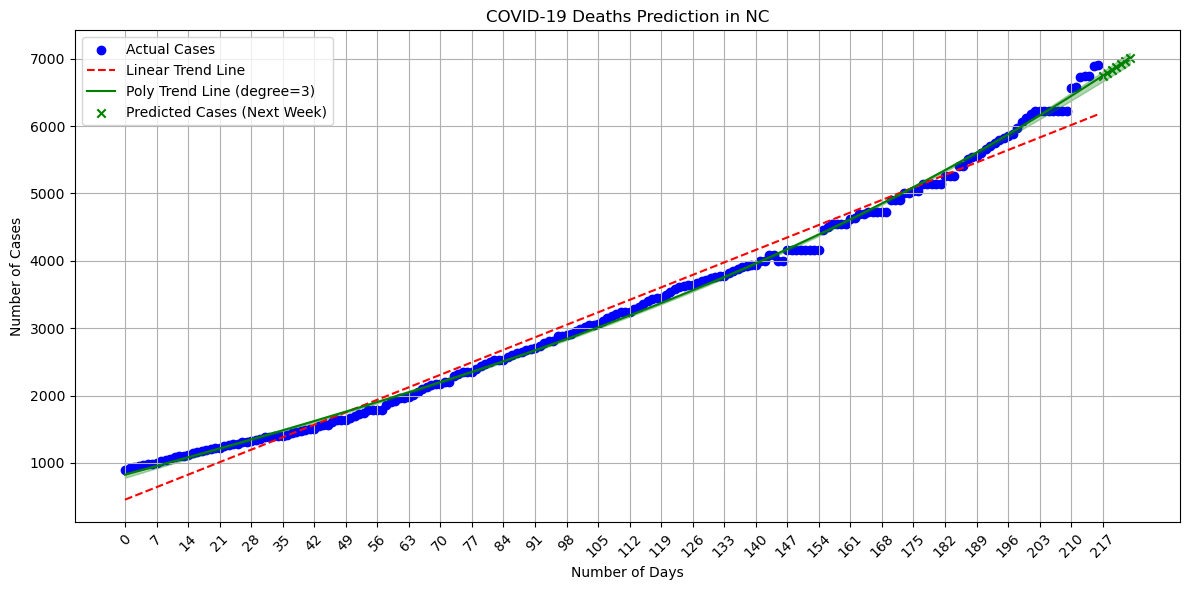

In [9]:
# Create and fit linear model
linear_reg = LinearRegression()
linear_reg.fit(days_since_start, deaths_data.reshape(-1, 1))
linear_predictions = linear_reg.predict(days_since_start)
linear_rmse = np.sqrt(mean_squared_error(deaths_data, linear_predictions))

# Create polynomial model
degree = 3  
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(days_since_start)
reg_poly = LinearRegression().fit(X_poly, deaths_data.reshape(-1, 1))

# Calculate RMSE for polynomial regression
poly_predictions = reg_poly.predict(X_poly)
poly_rmse = np.sqrt(mean_squared_error(deaths_data, poly_predictions))

# Print RMSE values
print(f"Linear Regression RMSE: {linear_rmse}")
print(f"Polynomial Regression RMSE (degree={degree}): {poly_rmse}")

# Predictions for the next week
days_future = np.arange(len(date_range), len(date_range) + 7).reshape(-1, 1)
X_future_poly = poly_features.transform(days_future)
deaths_pred = reg_poly.predict(X_future_poly)

# Bootstrap to calculate confidence interval
n_bootstraps = 1000
bootstrap_predictions = []
for _ in range(n_bootstraps):
    indices = np.random.choice(len(cases_data), size=len(cases_data), replace=True)
    X_boot = X_poly[indices]
    y_boot = deaths_data[indices]
    reg_boot = LinearRegression().fit(X_boot, y_boot.reshape(-1, 1))
    X_plot_poly = poly_features.transform(np.arange(len(date_range) + 7).reshape(-1, 1))
    bootstrap_predictions.append(reg_boot.predict(X_plot_poly))
    
# Calculate confidence interval
confidence_interval = np.percentile(bootstrap_predictions, [2.5, 97.5], axis=0)

# Flatten confidence interval arrays
confidence_interval_lower = confidence_interval[0].flatten()
confidence_interval_upper = confidence_interval[1].flatten()

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual data
plt.scatter(days_since_start, deaths_data, color='blue', label='Actual Cases')

# Plot linear regression trend line
plt.plot(days_since_start, linear_reg.predict(days_since_start), color='red', linestyle='--', label='Linear Trend Line')

# Plot polynomial regression trend line and confidence interval
plt.plot(np.arange(len(date_range) + 7), reg_poly.predict(X_plot_poly), color='green', label=f'Poly Trend Line (degree={degree})')
plt.fill_between(np.arange(len(date_range) + 7), confidence_interval_lower, confidence_interval_upper, color='green', alpha=0.3)

# Plotting predictions
plt.scatter(days_future, deaths_pred, color='green', marker='x', label='Predicted Cases (Next Week)')

plt.xlabel('Number of Days')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Deaths Prediction in NC')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, len(date_range) + 7, 7), rotation=45)
plt.tight_layout()
plt.show()

## Top 5 Counties

In [10]:
cases_dates_with_county = covid_df.columns[covid_df.columns.str.endswith('_x')]
cases_dates_with_county = cases_dates_with_county.delete([1, 2])

nc_df_copy = covid_df[covid_df['State'] == 'NC']
nc_df_copy = nc_df_copy[cases_dates_with_county]

# Sum cases and deaths
nc_df_copy['total_cases'] = nc_df_copy[cases_dates].sum(axis=1)

# Sort the values to find the top five counties
top_counties_cases = nc_df_copy.sort_values(by='total_cases', ascending=False).head(5)

print("Top 5 Counties in North Carolina by Total Cases:")
print(top_counties_cases[['County Name_x', 'total_cases']])

Top 5 Counties in North Carolina by Total Cases:
            County Name_x  total_cases
1949  Mecklenburg County       6220943
1981         Wake County       3846011
1930     Guilford County       2065078
1923      Forsyth County       1734688
1921       Durham County       1666981


In [11]:
def find_county_trends(name):
    county_df = nc_df_copy[nc_df_copy['County Name_x'] == name]
    county_df = county_df[cases_dates]

    case_counts = county_df.values.flatten()   # Flatten the DataFrame into a 1D array

    county_model = LinearRegression().fit(days_since_start, case_counts.reshape(-1, 1))

    y_pred = county_model.predict(days_since_start)

    # Calculate Mean Squared Error
    linear_rmse = np.sqrt(mean_squared_error(case_counts, y_pred))

    # Create polynomial model
    degree = 3  
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(days_since_start)
    reg_poly = LinearRegression().fit(X_poly, case_counts.reshape(-1, 1))

    # Calculate RMSE for polynomial regression
    poly_predictions = reg_poly.predict(X_poly)
    poly_rmse = np.sqrt(mean_squared_error(deaths_data, poly_predictions))

    # Print RMSE values
    print(f"Linear Regression RMSE: {linear_rmse}")
    print(f"Polynomial Regression RMSE (degree={degree}): {poly_rmse}")

    # Predictions for the next week
    days_future = np.arange(len(date_range), len(date_range) + 7).reshape(-1, 1)
    X_future_poly = poly_features.transform(days_future)
    county_pred = reg_poly.predict(X_future_poly)

    # Bootstrap to calculate confidence interval
    n_bootstraps = 1000
    bootstrap_predictions = []
    for _ in range(n_bootstraps):
        indices = np.random.choice(len(cases_data), size=len(cases_data), replace=True)
        X_boot = X_poly[indices]
        y_boot = case_counts[indices]
        reg_boot = LinearRegression().fit(X_boot, y_boot.reshape(-1, 1))
        X_plot_poly = poly_features.transform(np.arange(len(date_range) + 7).reshape(-1, 1))
        bootstrap_predictions.append(reg_boot.predict(X_plot_poly))

    # Calculate confidence interval
    confidence_interval = np.percentile(bootstrap_predictions, [2.5, 97.5], axis=0)

    # Flatten confidence interval arrays
    confidence_interval_lower = confidence_interval[0].flatten()
    confidence_interval_upper = confidence_interval[1].flatten()

    # Plotting
    plt.figure(figsize=(12, 6))

    # Plot actual data
    plt.scatter(days_since_start, case_counts, color='blue', label='Actual Cases')

    # Plot linear regression trend line
    plt.plot(days_since_start, county_model.predict(days_since_start), color='red', linestyle='--', label='Linear Trend Line')

    # Plot polynomial regression trend line and confidence interval
    plt.plot(np.arange(len(date_range) + 7), reg_poly.predict(X_plot_poly), color='green', label=f'Poly Trend Line (degree={degree})')
    plt.fill_between(np.arange(len(date_range) + 7), confidence_interval_lower, confidence_interval_upper, color='green', alpha=0.3)

    # Plotting predictions
    plt.scatter(days_future, county_pred, color='green', marker='x', label='Predicted Cases (Next Week)')

    plt.xlabel('Number of Days')
    plt.ylabel('Number of Cases')
    plt.title('COVID-19 Cases Prediction in ' + name)
    plt.legend()
    plt.grid(True)
    plt.xticks(np.arange(0, len(date_range) + 7, 7), rotation=45)
    plt.tight_layout()
    plt.show()

Linear Regression RMSE: 3272.674272370239
Polynomial Regression RMSE (degree=3): 28452.801962815007


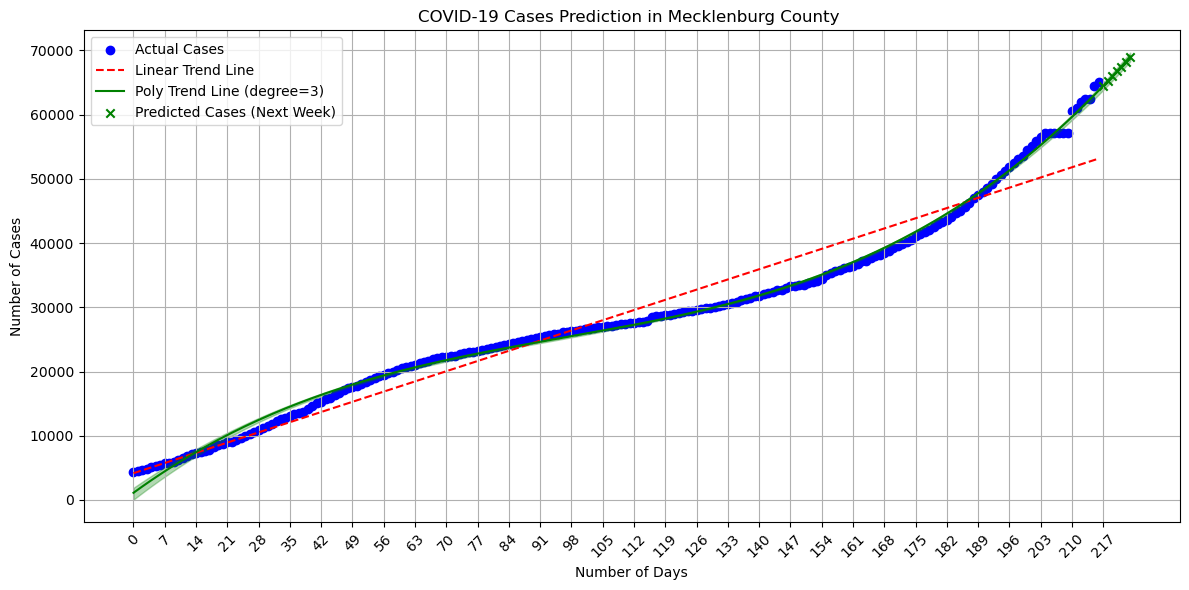

Linear Regression RMSE: 2601.1575360302954
Polynomial Regression RMSE (degree=3): 17027.902278322093


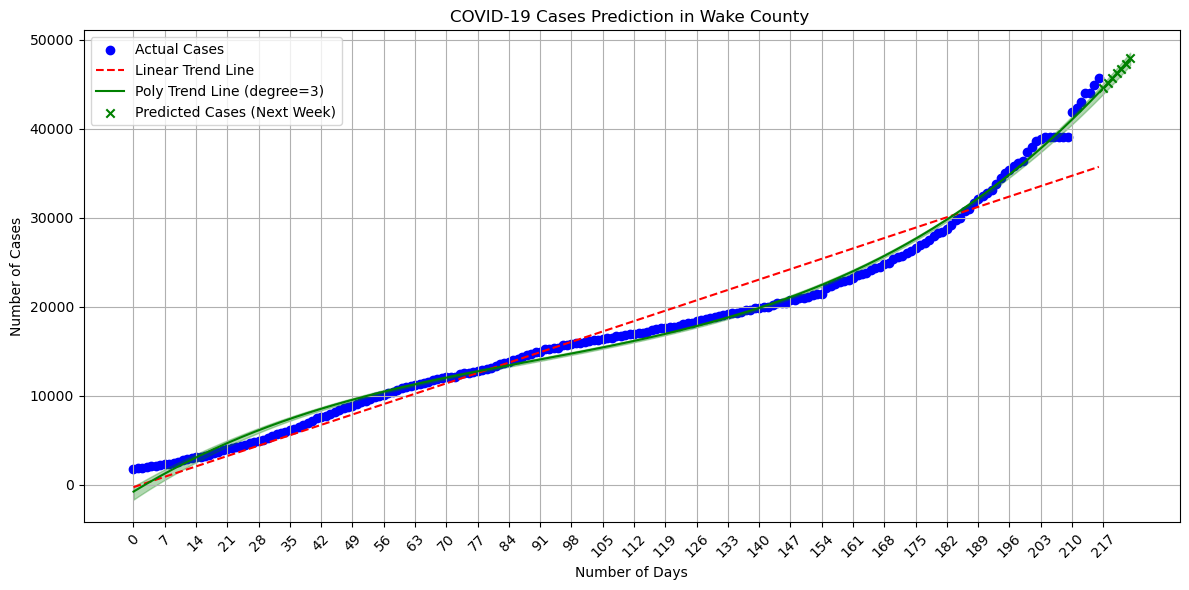

Linear Regression RMSE: 1793.5273918674177
Polynomial Regression RMSE (degree=3): 7771.209734638734


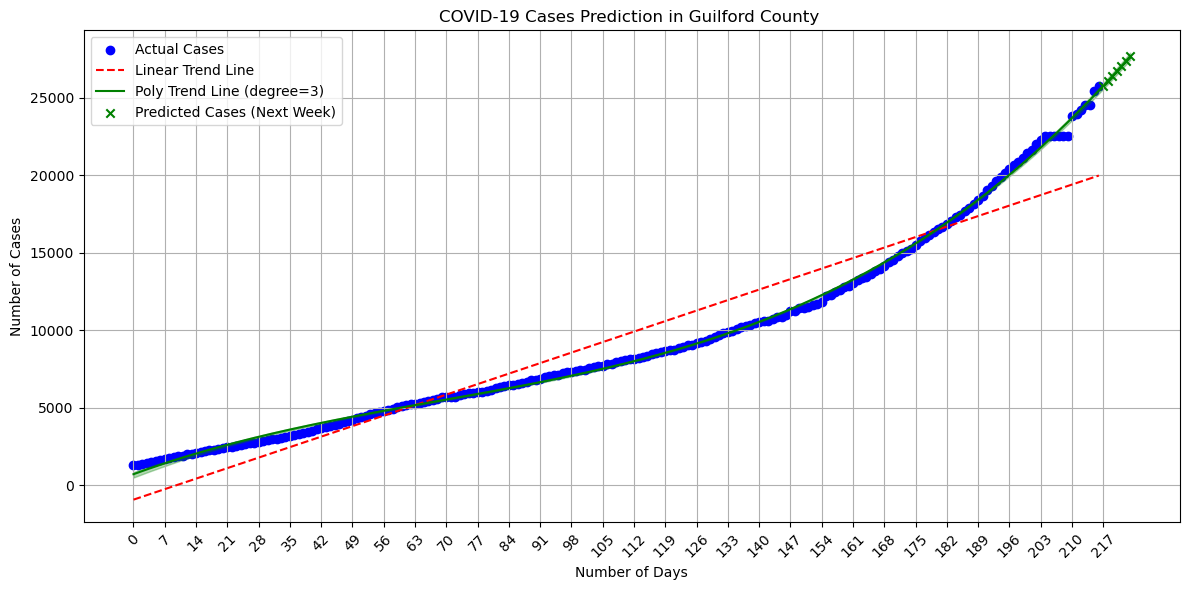

Linear Regression RMSE: 1714.951645451107
Polynomial Regression RMSE (degree=3): 5754.368739804061


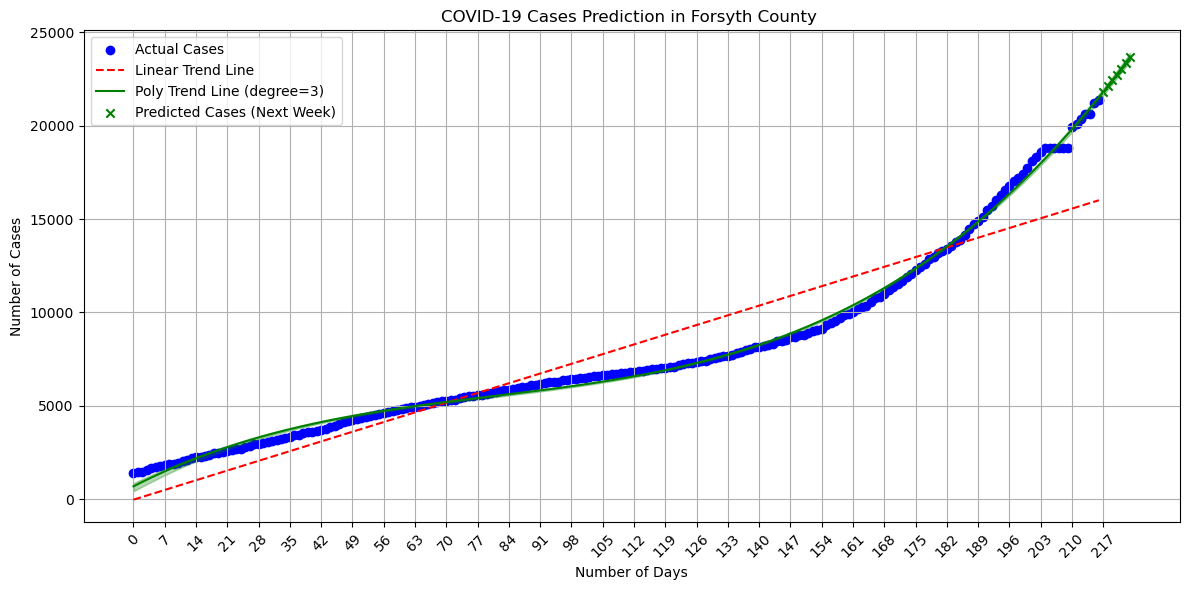

Linear Regression RMSE: 576.8551921876751
Polynomial Regression RMSE (degree=3): 4680.47960091776


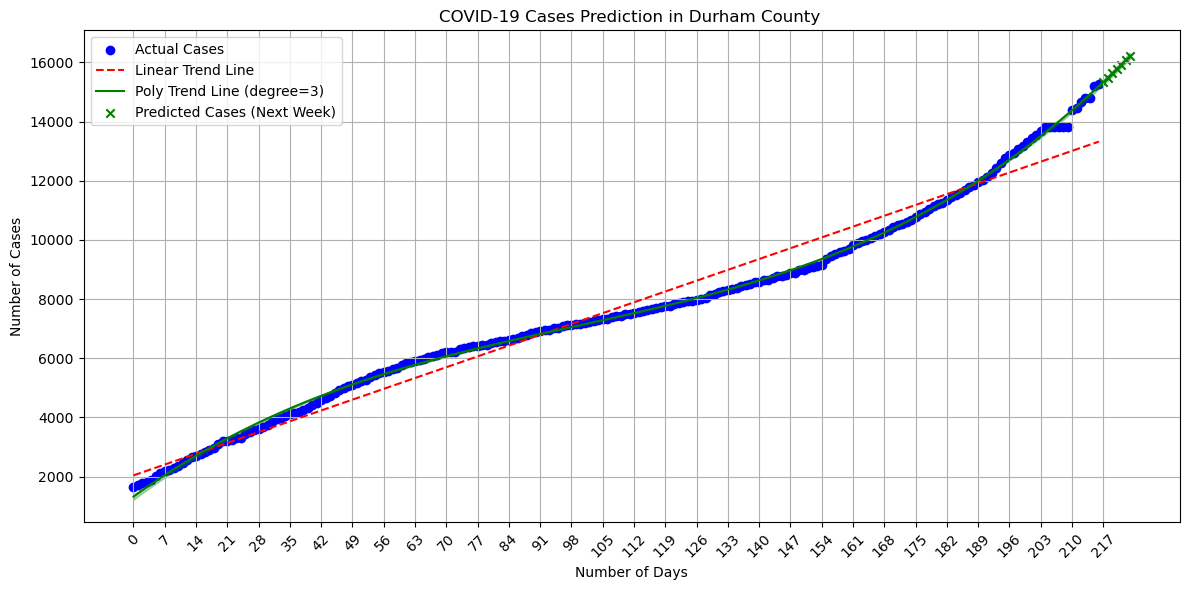

In [12]:
county_names = ['Mecklenburg County ', 'Wake County ', 'Guilford County ', 'Forsyth County ', 'Durham County ']

for name in county_names:
    find_county_trends(name)

## Analysis of 5 counties

All of the top 5 counties in North Carolina by case count seem to follow the same trend upwards. Although they all have differing peaks and rates of spread, they also follow the trend outlined by the overall North Carolina cases and prediction.

All of the counties above seem to be increasing steadily before slowing down around the 100 day mark. After this mark, it begins increasing again, at the same rate or faster than in the beginning. 

This 100-day mark where the counties seem to slow down the spread is somewhat shown on the overall NC case graph. It is different though as the NC overall graph seems to continue increasing and there is less of decrease in spread evident. The overall NC case graph seems to be increasing linearly at first and then switches to slightly exponential. Some of the county graphs like Mecklenburg, Wake, and Durham seem to be cubic.

## Hypothesis Testing

In [13]:
from scipy import stats

### Does a higher household number lead to a more rapid increase in COVID cases in North Carolina?

- Null Hypothesis: Total household number does not lead to a higher rate of change in Covid cases in North Carolina.
- Alternative Hypothesis: Higher total household number leads to a higher increase in COVID Cases in North Carolina.

In [14]:
hyp_nc_df = covid_df[covid_df['State'] == 'NC']
hyp_nc_df = hyp_nc_df[cases_dates]

rate_of_change_per_county = hyp_nc_df.diff(axis=1)

rate_of_change_per_county = rate_of_change_per_county.drop(columns=hyp_nc_df.columns[0])

average_rate_of_change_per_county = rate_of_change_per_county.mean(axis=1)

rate_df = pd.merge(covid_df['County Name_x'], pd.DataFrame(average_rate_of_change_per_county), left_index=True, right_index=True)

rate_df.rename(columns={0: 'Average Rate Change'}, inplace=True)

rate_df

,County Name_x,Average Rate Change
1890,Alamance County,48.666667
1891,Alexander County,12.828704
1892,Alleghany County,3.041667
1893,Anson County,6.560185
1894,Ashe County,5.907407
...,...,...
1985,Wayne County,30.069444
1986,Wilkes County,16.597222
1987,Wilson County,24.875000
1988,Yadkin County,10.828704


In [15]:
pd.set_option('display.max_columns', None)

# Create a dataframe from the CSV file

social_data = pd.read_csv('ACSDP1Y2022.DP02-Data.csv')
social_data_df = pd.DataFrame(social_data)

# Remove the headings of the columns and set the heading equal to the first row since it is more specific

social_data_df.columns = social_data_df.iloc[0]
social_data_df = social_data_df.drop(0)
social_data_df = social_data_df.reset_index(drop=True)

# Changing Geography name for merging to countyFIPS

new_column_name = 'countyFIPS'
social_data_df = social_data_df.rename(columns={'Geography': new_column_name})

# Remove the first 9 characters of countyFIPS for merging with Covid-19 data

social_data_df['countyFIPS'] = social_data_df['countyFIPS'].str[9:]

# Merging Enrichment with Covid-19 Super Set

social_data_df.countyFIPS = social_data_df.countyFIPS.astype(int)

covid_data = pd.read_csv('super_covid_data.csv')
covid_data_df = pd.DataFrame(covid_data)

merged_data = pd.merge(covid_data_df, social_data_df, on='countyFIPS', how='outer')

# household data for total households in a county

household_data = merged_data[['countyFIPS', 'State', 'County Name', 'Estimate!!HOUSEHOLDS BY TYPE!!Total households']]
household_data = household_data[household_data['State'] == 'NC'].dropna()

In [16]:
rates_household_df = pd.merge(rate_df, household_data, left_index=True, right_index=True, how='inner')

rates_household_df = rates_household_df[['County Name', 'Average Rate Change', 'Estimate!!HOUSEHOLDS BY TYPE!!Total households']]

rates_household_df

,County Name,Average Rate Change,Estimate!!HOUSEHOLDS BY TYPE!!Total households
1890,Alamance County,48.666667,70125
1899,Brunswick County,21.129630,69478
1900,Buncombe County,43.782407,103428
1901,Burke County,27.935185,37296
1902,Cabarrus County,52.157407,87195
1903,Caldwell County,28.046296,33429
1905,Carteret County,12.935185,31294
1907,Catawba County,52.967593,67237
1908,Chatham County,10.782407,34020
1912,Cleveland County,32.060185,38712


In [17]:
threshold = rates_household_df['Estimate!!HOUSEHOLDS BY TYPE!!Total households'].median()  # Using median as the threshold

group_higher_household = rates_household_df[rates_household_df['Estimate!!HOUSEHOLDS BY TYPE!!Total households'].astype(int) > threshold]['Average Rate Change']
group_lower_household = rates_household_df[rates_household_df['Estimate!!HOUSEHOLDS BY TYPE!!Total households'].astype(int) <= threshold]['Average Rate Change']

t_statistic, p_value = stats.ttest_ind(group_higher_household, group_lower_household, alternative='greater')

print("Two-Sample t-Test:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

Two-Sample t-Test:
T-Statistic: 3.6986927298993137
P-Value: 0.0003255078406022306


Since our P-Value is less than 0.05, it is statistically significant. The code separated the counties into two groups based on total household number. If the county's household number was higher than the overall mean, it was placed in the larger household number group. The data contained the rate of change in COVID cases for each county.

After separating the counties, I found the t_statistic and p_value based on the higher and lower household groups. I used the parameter: `alternative='greater'` to make it a one-tailed test. We are testing to see if the mean of the rate of change of the first group (higher household number) is significantly greater than the mean of the second group with lower household numbers.

Since the P-Value is < 0.05, we can reject the null hypothesis which was, 'Total household number does not lead to a higher rate of change in Covid cases.'

### Does having a higher number of the population who has a college education lead to a slower rate of COVID spread compared to a high population of no degree education in North Carolina?

- Null Hypothesis: Higher number of college graduates does not lead a slower rate of COVID spread in North Carolina.
- Alternative Hypothesis: Higher number of college graduates leads to a slower rate of COVID spread in North Carolina.

In [18]:
graduate_data = merged_data[['countyFIPS', 'State', 'County Name', "Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher"]]
graduate_data = graduate_data[graduate_data['State'] == 'NC'].dropna()

rates_grad_df = pd.merge(rate_df, graduate_data, left_index=True, right_index=True, how='inner')
rates_grad_df = rates_grad_df[['County Name', 'Average Rate Change', "Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher"]]
rates_grad_df

,County Name,Average Rate Change,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher
1890,Alamance County,48.666667,31335
1899,Brunswick County,21.129630,43257
1900,Buncombe County,43.782407,93108
1901,Burke County,27.935185,14313
1902,Cabarrus County,52.157407,63682
1903,Caldwell County,28.046296,12301
1905,Carteret County,12.935185,19211
1907,Catawba County,52.967593,29840
1908,Chatham County,10.782407,28276
1912,Cleveland County,32.060185,14386


In [19]:
grad_col_name = "Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher"
threshold = rates_grad_df[grad_col_name].median()  # Using median as the threshold

group_higher_grads = rates_grad_df[rates_grad_df[grad_col_name].astype(int) > threshold]['Average Rate Change']
group_lower_grads = rates_grad_df[rates_grad_df[grad_col_name].astype(int) <= threshold]['Average Rate Change']

t_statistic, p_value = stats.ttest_ind(group_higher_grads, group_lower_grads, alternative='less')

print("Two-Sample t-Test:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

Two-Sample t-Test:
T-Statistic: 3.2563178641234884
P-Value: 0.9988487192174743


This hypothesis gives us a very different result from the previous tests. Here we are trying to find out if having a high number of college graduates decreases the rate of spread of COVID in NC. This question comes from the idea that college graduates my be more knowledgable about the disease and take the expected safety measures.

I separated the counties once again into two groups based on if they had a number of grads higher than the overall mean or lower. Once I did that, I performed the t-tests, this time with the `alternative='less'` in order to find out if the higher grad group had a lower rate of change in COVID cases.

The P-Value received from the tests was 0.99. This shows that there is no statistically significant evidence that having a higher number of grads reduces the spread of COVID. We fail to reject the null hypothesis.

### Does having a high number of non-citizens affect COVID spread in North Carolina?

- Null Hypothesis: Having a high number of non-citizens does not affect COVID spread in North Carolina.
- Alternative Hypothesis: Having a high number of non-citizens does affect COVID spread in North Carolina.

In [20]:
citizen_col_name = "Estimate!!U.S. CITIZENSHIP STATUS!!Foreign-born population!!Not a U.S. citizen"

citizen_data = merged_data[['countyFIPS', 'State', 'County Name', citizen_col_name]]
citizen_data = citizen_data[citizen_data['State'] == 'NC'].dropna()

rates_citi_df = pd.merge(rate_df, citizen_data, left_index=True, right_index=True, how='inner')
rates_citi_df = rates_citi_df[['County Name', 'Average Rate Change', citizen_col_name]]
rates_citi_df

,County Name,Average Rate Change,Estimate!!U.S. CITIZENSHIP STATUS!!Foreign-born population!!Not a U.S. citizen
1890,Alamance County,48.666667,8681
1899,Brunswick County,21.129630,1154
1900,Buncombe County,43.782407,8243
1901,Burke County,27.935185,2049
1902,Cabarrus County,52.157407,8720
1903,Caldwell County,28.046296,1947
1905,Carteret County,12.935185,1290
1907,Catawba County,52.967593,5390
1908,Chatham County,10.782407,4742
1912,Cleveland County,32.060185,1028


In [21]:
threshold = rates_citi_df[citizen_col_name].median()  # Using median as the threshold

group_higher_non_citizens = rates_citi_df[rates_citi_df[citizen_col_name].astype(int) > threshold]['Average Rate Change']
group_lower_non_citizens = rates_citi_df[rates_citi_df[citizen_col_name].astype(int) <= threshold]['Average Rate Change']

t_statistic, p_value = stats.ttest_ind(group_higher_non_citizens, group_lower_non_citizens)

print("Two-Sample t-Test:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

Two-Sample t-Test:
T-Statistic: 3.1340813482455605
P-Value: 0.0032236234690754266


This statistical analysis seems to support the idea that a higher number of foreign born non-citizens affects the spread of COVID in North Carolina. There are several factors at play here though. Usually with higher numbers of non-citizens means that there is an even higher number of people in the state in general which would contribute to a higher spread. Non-citizens might also not be provided the same care as citizens. 

Despite these factors, with a P-Value of 0.003, there is evidence to reject the null hypothesis and suggest the alternative hypothesis that having a higher number of foreign born non-citizens affects the spread of COVID-19.

This test did not test for a higher or lower difference. It simply tested for statistically significant difference.